In [5]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image

In [14]:
# ---- Configurations ---- #
base_model_id = "runwayml/stable-diffusion-v1-5"  # or your custom fine-tuned base model
lora_path = "./lora_output"                      # folder containing your LoRA weights
textual_inversion_path = "./textual_inversion_output"    # folder containing your .bin or .pt or .safetensors file
custom_token = "<ultrasound>"                     # this is the token you used for textual inversion

prompt = f"An {custom_token} image of a benign breast lesion"
output_path = "data/LoRA_textual_inversion/output_test.png"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
# ---- Load the Stable Diffusion pipeline ---- #
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    safety_checker=None,  # Disable for medical or synthetic tasks
    scheduler=DPMSolverMultistepScheduler.from_pretrained(base_model_id, subfolder="scheduler")
).to(device)

# ---- Load Textual Inversion ---- #
pipe.load_textual_inversion(textual_inversion_path, token=custom_token)

# ---- Load LoRA weights ---- #
pipe.unet.load_attn_procs(lora_path)

# Optional: Enable memory-efficient attention if you're on a limited GPU
pipe.enable_xformers_memory_efficient_attention()

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 10.82it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
/home/fa926284/Documents/Repos/BUSI_diffusion/venv/lib/python3.10/site-packages/diffusers/loaders/unet.py:212: FutureWarning: `load_attn_procs` is deprecated and will be removed in version 0.40.0. Using the `load_attn_procs()` method has been deprecated and will be remo

100%|██████████| 50/50 [00:03<00:00, 14.97it/s]


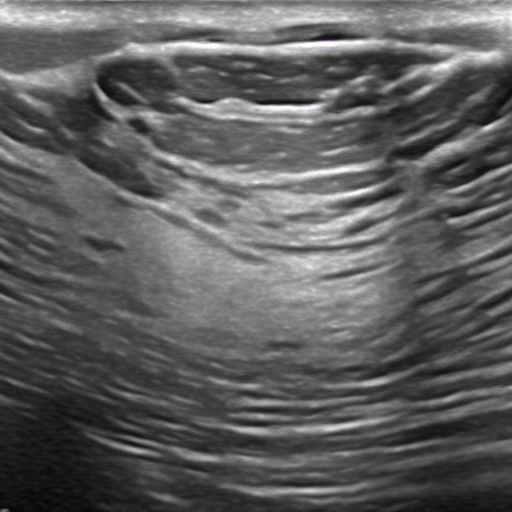

In [16]:
# ---- Generate the image ---- #
generator = torch.Generator(device=device).manual_seed(42)  # For reproducibility

image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]

image
# ---- Save the image ---- #
# image.save(output_path)
# print(f"Generated image saved to {output_path}")

# Optionally show it in a notebook or GUI
# image.show()
